# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import requests
from bs4 import BeautifulSoup
import json

### Introduction

Here, we try and answer a very underevaluated question of TB cases in the US

### Problem statement

In 2021, the year following the outbreak of the COVID-19 pandemic, right as it was coming under control, we observed a rise in tuberculosis cases in the USA. 
**THIS PROJECT AIMS TO EXAMINE THE MIGRATION OF THE DESTINATION WITH THE MOST TB INCIDENTS**


### Research Approach

To answer this question of migration coinciding with Tubercolosis cases, we attempt to obtain a Tubercolosis dataset, and then a Migration Dataset, to find where they intersect, hopefully to help answerr our research question

## 1. Gathering data


#### **Dataset 1**: National Library of Medicine's Tuberculosis Cases and Incidences between 2019 - 2022

Backrgound: This dataset accounts for out Tubercolosis cases needed as would be extracted from the USA's Library of Medicines official website



Type: Resource link: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10042618/

Method: Scrapping using BeautifulSoup

Dataset variables:



*   Jurisdiction: State in the USA being considered
*   Cases*2019*: total number of cases for each state in 2019
*   Cases*2020*: total number of cases for each state in 2020
*   Cases*2021*: total number of cases for each state in 2021
*   Cases*2022*: total number of cases for each state in 2022
*   Incidence*2019*: incidence rate in the year 2019, calculated by dividing the number of new and relapse TB cases in the year by the total population at risk during that period, and then multiplying by 100,000 to standardize the rate
*   Incidence*2020*: incidence rate in 2020
*   Incidence*2021*: incidence rate in 2021
*   Incidence*2022*: incidence rate estimate in 2022

In [261]:
url='https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10042618/'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36'
}

In [262]:
response=requests.get(url, headers=headers)
print(response)

<Response [200]>


In [263]:
soup=BeautifulSoup(response.text, 'html.parser')
soup


<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<!-- Mobile properties -->
<meta content="True" name="HandheldFriendly"/>
<meta content="320" name="MobileOptimized"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<!-- Stylesheets -->
<link href="/pmc/static/CACHE/css/output.6fd905b0fb6f.css" rel="stylesheet" type="text/css"/>
<link href="/pmc/static/CACHE/css/output.9c7b200444b8.css" rel="stylesheet" type="text/css"/><link href="/pmc/static/CACHE/css/output.9730e47fc7c0.css" rel="stylesheet" type="text/css"/><link href="/pmc/static/CACHE/css/output.3766d7ad0d2d.css" rel="stylesheet" type="text/css"/><link href="/pmc/static/CACHE/css/output.e3c3c2c84eb3.css" rel="stylesheet" type="text/css"/>
<link href="https://maxcdn.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css" rel="stylesheet">
<link href="/pmc/static/bundles/base/base.a2ef7ca69e4b20dff539.css" rel="stylesheet" type="te

In [264]:
table = soup.find('table')
table

<table class="rendered small default_table" frame="hsides" rules="groups" width="4.510in"><thead><tr><th align="left" colspan="1" rowspan="2" scope="col" valign="bottom">Jurisdiction</th><th align="center" colspan="4" rowspan="1" scope="colgroup" valign="top">No. of cases*<hr/></th><th align="center" colspan="4" rowspan="1" scope="colgroup" valign="top">Incidence<sup>†</sup><hr/></th></tr><tr><th align="center" colspan="1" rowspan="1" scope="colgroup" valign="top">2019</th><th align="center" colspan="1" rowspan="1" scope="col" valign="top">2020</th><th align="center" colspan="1" rowspan="1" scope="col" valign="top">2021</th><th align="center" colspan="1" rowspan="1" scope="col" valign="top">2022</th><th align="center" colspan="1" rowspan="1" scope="col" valign="top">2019</th><th align="center" colspan="1" rowspan="1" scope="col" valign="top">2020</th><th align="center" colspan="1" rowspan="1" scope="col" valign="top">2021</th><th align="center" colspan="1" rowspan="1" scope="col" valig

In [265]:
body=table.find_all('tr')

In [266]:
headers = []
for th in table.find_all('th'):
    headers.append(th.text.strip())

In [267]:
headers

['Jurisdiction',
 'No. of cases*',
 'Incidence†',
 '2019',
 '2020',
 '2021',
 '2022',
 '2019',
 '2020',
 '2021',
 '2022']

In [268]:
headers = ['Jurisdiction','Cases2019','Cases2020','Cases2021','Cases2022','Incidence2019','Incidence2020','Incidence2021','Incidence2022']

In [269]:
rows = []
for tr in table.find_all('tr')[1:]:
    cells = tr.find_all('td')
    row = [cell.text.strip() for cell in cells]
    rows.append(row)

In [270]:
rows

[[],
 ['Alabama', '87', '72', '91', '66', '1.8', '1.4', '1.8', '1.3'],
 ['Alaska', '58', '58', '58', '96', '7.9', '7.9', '7.9', '13.1'],
 ['Arizona', '183', '136', '129', '154', '2.5', '1.9', '1.8', '2.1'],
 ['Arkansas', '64', '59', '69', '69', '2.1', '2.0', '2.3', '2.3'],
 ['California',
  '2,110',
  '1,703',
  '1,749',
  '1,843',
  '5.4',
  '4.3',
  '4.5',
  '4.7'],
 ['Colorado', '66', '52', '58', '57', '1.1', '0.9', '1.0', '1.0'],
 ['Connecticut', '67', '54', '54', '67', '1.9', '1.5', '1.5', '1.8'],
 ['Delaware', '19', '17', '41', '13', '1.9', '1.7', '4.1', '1.3'],
 ['District of Columbia', '24', '19', '18', '15', '3.4', '2.8', '2.7', '2.2'],
 ['Florida', '558', '412', '500', '536', '2.6', '1.9', '2.3', '2.4'],
 ['Georgia', '302', '220', '222', '256', '2.8', '2.1', '2.1', '2.3'],
 ['Hawaii', '99', '92', '106', '101', '7.0', '6.3', '7.3', '7.0'],
 ['Idaho', '7', '8', '5', '11', '0.4', '0.4', '0.3', '0.6'],
 ['Illinois', '326', '216', '254', '298', '2.6', '1.7', '2.0', '2.4'],
 ['Indi

In [271]:
df=pd.DataFrame(columns=headers, data=rows)

In [272]:
df.head(10)

,Jurisdiction,Cases2019,Cases2020,Cases2021,Cases2022,Incidence2019,Incidence2020,Incidence2021,Incidence2022
0,None,None,None,None,None,None,None,None,None
1,Alabama,87,72,91,66,1.8,1.4,1.8,1.3
2,Alaska,58,58,58,96,7.9,7.9,7.9,13.1
3,Arizona,183,136,129,154,2.5,1.9,1.8,2.1
4,Arkansas,64,59,69,69,2.1,2.0,2.3,2.3
5,California,"2,110","1,703","1,749","1,843",5.4,4.3,4.5,4.7
6,Colorado,66,52,58,57,1.1,0.9,1.0,1.0
7,Connecticut,67,54,54,67,1.9,1.5,1.5,1.8
8,Delaware,19,17,41,13,1.9,1.7,4.1,1.3
9,District of Columbia,24,19,18,15,3.4,2.8,2.7,2.2


In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Jurisdiction   52 non-null     object
 1   Cases2019      52 non-null     object
 2   Cases2020      52 non-null     object
 3   Cases2021      52 non-null     object
 4   Cases2022      52 non-null     object
 5   Incidence2019  52 non-null     object
 6   Incidence2020  52 non-null     object
 7   Incidence2021  52 non-null     object
 8   Incidence2022  52 non-null     object
dtypes: object(9)
memory usage: 3.9+ KB


In [274]:
df.to_csv('beautifulsoupscrape.csv', index=False)

#### Dataset 2: API gotten from Census.gov for the US' Immigration in the Year 2021

Background: This data, provided by the Census body of the United States accounts for ALL documented immigration in the Year 2021 from every possible origin across the world



Type: Resource in 'https://www.census.gov/data/developers/data-sets/acs-migration-flows.html'

Method: API scrapping through JSON

Dataset variables:

*   FULL1_NAME: the full name of place where people move FROM
*   FULL2_NAME: the full name of place where people move TO
*   GEOID1: Geographic identifier(GEOID) for origin location
*   GEOID2: Geographic identifier(GEOID) for desination
*   MOVEDIN: number of people that moved into GEOID2(destination) from GEOID1(origin)
*   state: state code as in the US
*   county: county code for specific county in the US

In [275]:
url = 'https://api.census.gov/data/2021/acs/flows?get=FULL1_NAME,FULL2_NAME,GEOID1,GEOID2,MOVEDIN&for=county:*&in=state:*'

In [276]:
response=requests.get(url)
response

<Response [200]>

In [277]:
body=response.json()
body

[['FULL1_NAME',
  'FULL2_NAME',
  'GEOID1',
  'GEOID2',
  'MOVEDIN',
  'state',
  'county'],
 ['Autauga County', 'Alabama', '01001', '01', '2036', '01', '001'],
 ['Autauga County', 'Arizona', '01001', '04', '84', '01', '001'],
 ['Autauga County', 'Colorado', '01001', '08', '1', '01', '001'],
 ['Autauga County', 'Florida', '01001', '12', '23', '01', '001'],
 ['Autauga County', 'Georgia', '01001', '13', '352', '01', '001'],
 ['Autauga County', 'Indiana', '01001', '18', '10', '01', '001'],
 ['Autauga County', 'Kentucky', '01001', '21', '31', '01', '001'],
 ['Autauga County', 'Louisiana', '01001', '22', '227', '01', '001'],
 ['Autauga County', 'Michigan', '01001', '26', '36', '01', '001'],
 ['Autauga County', 'Minnesota', '01001', '27', '6', '01', '001'],
 ['Autauga County', 'Nevada', '01001', '32', '11', '01', '001'],
 ['Autauga County', 'New Jersey', '01001', '34', '11', '01', '001'],
 ['Autauga County', 'New Mexico', '01001', '35', '119', '01', '001'],
 ['Autauga County', 'North Carolin

In [278]:
jsonhead=body[0]
jsonhead

['FULL1_NAME', 'FULL2_NAME', 'GEOID1', 'GEOID2', 'MOVEDIN', 'state', 'county']

In [279]:
jsonbody=body[1:]
jsonbody

[['Autauga County', 'Alabama', '01001', '01', '2036', '01', '001'],
 ['Autauga County', 'Arizona', '01001', '04', '84', '01', '001'],
 ['Autauga County', 'Colorado', '01001', '08', '1', '01', '001'],
 ['Autauga County', 'Florida', '01001', '12', '23', '01', '001'],
 ['Autauga County', 'Georgia', '01001', '13', '352', '01', '001'],
 ['Autauga County', 'Indiana', '01001', '18', '10', '01', '001'],
 ['Autauga County', 'Kentucky', '01001', '21', '31', '01', '001'],
 ['Autauga County', 'Louisiana', '01001', '22', '227', '01', '001'],
 ['Autauga County', 'Michigan', '01001', '26', '36', '01', '001'],
 ['Autauga County', 'Minnesota', '01001', '27', '6', '01', '001'],
 ['Autauga County', 'Nevada', '01001', '32', '11', '01', '001'],
 ['Autauga County', 'New Jersey', '01001', '34', '11', '01', '001'],
 ['Autauga County', 'New Mexico', '01001', '35', '119', '01', '001'],
 ['Autauga County', 'North Carolina', '01001', '37', '32', '01', '001'],
 ['Autauga County', 'Oklahoma', '01001', '40', '7', '0

In [280]:
df1=pd.DataFrame(columns=jsonhead, data=jsonbody)

In [281]:
df1.to_csv('apijsonscrape.csv', index=False)

In [282]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66119 entries, 0 to 66118
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   FULL1_NAME  66119 non-null  object
 1   FULL2_NAME  66119 non-null  object
 2   GEOID1      66119 non-null  object
 3   GEOID2      66119 non-null  object
 4   MOVEDIN     66119 non-null  object
 5   state       66119 non-null  object
 6   county      66119 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB


## 2. Assess data

Here, before analysis, we assess our data according to data quality and tidiness metrics


### Quality Issue, Dataset 1:

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Jurisdiction   52 non-null     object
 1   Cases2019      52 non-null     object
 2   Cases2020      52 non-null     object
 3   Cases2021      52 non-null     object
 4   Cases2022      52 non-null     object
 5   Incidence2019  52 non-null     object
 6   Incidence2020  52 non-null     object
 7   Incidence2021  52 non-null     object
 8   Incidence2022  52 non-null     object
dtypes: object(9)
memory usage: 3.9+ KB


In [284]:
df.duplicated().sum()

0

In [285]:
df.sample(5)

,Jurisdiction,Cases2019,Cases2020,Cases2021,Cases2022,Incidence2019,Incidence2020,Incidence2021,Incidence2022
27,Montana,2,4,3,6,0.2,0.4,0.3,0.5
3,Arizona,183,136,129,154,2.5,1.9,1.8,2.1
15,Indiana,108,92,127,99,1.6,1.4,1.9,1.4
14,Illinois,326,216,254,298,2.6,1.7,2.0,2.4
50,Wisconsin,51,35,66,52,0.9,0.6,1.1,0.9


In [286]:
df.head()

,Jurisdiction,Cases2019,Cases2020,Cases2021,Cases2022,Incidence2019,Incidence2020,Incidence2021,Incidence2022
0,None,None,None,None,None,None,None,None,None
1,Alabama,87,72,91,66,1.8,1.4,1.8,1.3
2,Alaska,58,58,58,96,7.9,7.9,7.9,13.1
3,Arizona,183,136,129,154,2.5,1.9,1.8,2.1
4,Arkansas,64,59,69,69,2.1,2.0,2.3,2.3


In [287]:
df.describe()

,Jurisdiction,Cases2019,Cases2020,Cases2021,Cases2022,Incidence2019,Incidence2020,Incidence2021,Incidence2022
count,52,52,52,52,52,52,52,52,52
unique,52,50,47,45,46,29,26,27,27
top,Alabama,70,67,3,11,1.9,1.3,1.9,1.3
freq,1,2,3,3,3,5,4,5,4


In [288]:
df.head()

,Jurisdiction,Cases2019,Cases2020,Cases2021,Cases2022,Incidence2019,Incidence2020,Incidence2021,Incidence2022
0,None,None,None,None,None,None,None,None,None
1,Alabama,87,72,91,66,1.8,1.4,1.8,1.3
2,Alaska,58,58,58,96,7.9,7.9,7.9,13.1
3,Arizona,183,136,129,154,2.5,1.9,1.8,2.1
4,Arkansas,64,59,69,69,2.1,2.0,2.3,2.3


In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Jurisdiction   52 non-null     object
 1   Cases2019      52 non-null     object
 2   Cases2020      52 non-null     object
 3   Cases2021      52 non-null     object
 4   Cases2022      52 non-null     object
 5   Incidence2019  52 non-null     object
 6   Incidence2020  52 non-null     object
 7   Incidence2021  52 non-null     object
 8   Incidence2022  52 non-null     object
dtypes: object(9)
memory usage: 3.9+ KB


### Issue and justification: 
After assesing both visually and programmatically, we observe:
* Completeness: the first rows are not acttual inputs(due to scraping of course)
* Validity: the datatype of every column, aside the Jusdiction column is in the invalid, we can see this usng .describe()



### Quality Issue, Dataset 2:

In [290]:
df1.head()

,FULL1_NAME,FULL2_NAME,GEOID1,GEOID2,MOVEDIN,state,county
0,Autauga County,Alabama,01001,01,2036,01,001
1,Autauga County,Arizona,01001,04,84,01,001
2,Autauga County,Colorado,01001,08,1,01,001
3,Autauga County,Florida,01001,12,23,01,001
4,Autauga County,Georgia,01001,13,352,01,001


In [291]:
df1.isnull().sum()

FULL1_NAME    0
FULL2_NAME    0
GEOID1        0
GEOID2        0
MOVEDIN       0
state         0
county        0
dtype: int64

In [292]:
df1.duplicated().sum()

0

In [293]:
df1.sample(10)

,FULL1_NAME,FULL2_NAME,GEOID1,GEOID2,MOVEDIN,state,county
11600,Gwinnett County,Asia,13135,SI,2198,13,135
34491,Lancaster County,New Mexico,31109,35,113,31,109
62463,Cabell County,West Virginia,54011,54,3609,54,011
42956,Cuyahoga County,New Jersey,39035,34,429,39,035
8403,Escambia County,Arizona,12033,04,401,12,033
60145,Westmoreland County,Virginia,51193,51,899,51,193
9408,Okeechobee County,Kentucky,12093,21,37,12,093
18280,Henry County,Illinois,19087,17,60,19,087
49379,Washington County,New York,44009,36,603,44,009
10981,Coweta County,New Jersey,13077,34,37,13,077


In [294]:
df1.sample(5)

,FULL1_NAME,FULL2_NAME,GEOID1,GEOID2,MOVEDIN,state,county
50189,Lexington County,Arkansas,45063,05,24,45,063
5823,Adams County,Massachusetts,08001,25,261,08,001
33720,Sheridan County,Illinois,30091,17,6,30,091
40318,Halifax County,Ohio,37083,39,16,37,083
50252,Marion County,Caribbean,45067,AR,11,45,067


In [295]:
df1.head()

,FULL1_NAME,FULL2_NAME,GEOID1,GEOID2,MOVEDIN,state,county
0,Autauga County,Alabama,01001,01,2036,01,001
1,Autauga County,Arizona,01001,04,84,01,001
2,Autauga County,Colorado,01001,08,1,01,001
3,Autauga County,Florida,01001,12,23,01,001
4,Autauga County,Georgia,01001,13,352,01,001


In [296]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66119 entries, 0 to 66118
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   FULL1_NAME  66119 non-null  object
 1   FULL2_NAME  66119 non-null  object
 2   GEOID1      66119 non-null  object
 3   GEOID2      66119 non-null  object
 4   MOVEDIN     66119 non-null  object
 5   state       66119 non-null  object
 6   county      66119 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB


In [297]:
df1.head()

,FULL1_NAME,FULL2_NAME,GEOID1,GEOID2,MOVEDIN,state,county
0,Autauga County,Alabama,01001,01,2036,01,001
1,Autauga County,Arizona,01001,04,84,01,001
2,Autauga County,Colorado,01001,08,1,01,001
3,Autauga County,Florida,01001,12,23,01,001
4,Autauga County,Georgia,01001,13,352,01,001


### Issue and justification: 
Inspecting both visually and programmatically we realise these:
* Validity: the dataframe has so many of it columns in the wrong datatype, realistically, only its Jurisdiction column should be of object datatype, hence, its inputs are not valid
* Accuracy: the state, county, goeid column variables and their values arent reflective of what is expected as in the official US immigration data
* Unique: there as so many duplicates of so little to no difference

### Tidiness Issue, Dataset 1:

In [298]:
df.head(10)

,Jurisdiction,Cases2019,Cases2020,Cases2021,Cases2022,Incidence2019,Incidence2020,Incidence2021,Incidence2022
0,None,None,None,None,None,None,None,None,None
1,Alabama,87,72,91,66,1.8,1.4,1.8,1.3
2,Alaska,58,58,58,96,7.9,7.9,7.9,13.1
3,Arizona,183,136,129,154,2.5,1.9,1.8,2.1
4,Arkansas,64,59,69,69,2.1,2.0,2.3,2.3
5,California,"2,110","1,703","1,749","1,843",5.4,4.3,4.5,4.7
6,Colorado,66,52,58,57,1.1,0.9,1.0,1.0
7,Connecticut,67,54,54,67,1.9,1.5,1.5,1.8
8,Delaware,19,17,41,13,1.9,1.7,4.1,1.3
9,District of Columbia,24,19,18,15,3.4,2.8,2.7,2.2


In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Jurisdiction   52 non-null     object
 1   Cases2019      52 non-null     object
 2   Cases2020      52 non-null     object
 3   Cases2021      52 non-null     object
 4   Cases2022      52 non-null     object
 5   Incidence2019  52 non-null     object
 6   Incidence2020  52 non-null     object
 7   Incidence2021  52 non-null     object
 8   Incidence2022  52 non-null     object
dtypes: object(9)
memory usage: 3.9+ KB


In [300]:
df.head(20)

,Jurisdiction,Cases2019,Cases2020,Cases2021,Cases2022,Incidence2019,Incidence2020,Incidence2021,Incidence2022
0,None,None,None,None,None,None,None,None,None
1,Alabama,87,72,91,66,1.8,1.4,1.8,1.3
2,Alaska,58,58,58,96,7.9,7.9,7.9,13.1
3,Arizona,183,136,129,154,2.5,1.9,1.8,2.1
4,Arkansas,64,59,69,69,2.1,2.0,2.3,2.3
5,California,"2,110","1,703","1,749","1,843",5.4,4.3,4.5,4.7
6,Colorado,66,52,58,57,1.1,0.9,1.0,1.0
7,Connecticut,67,54,54,67,1.9,1.5,1.5,1.8
8,Delaware,19,17,41,13,1.9,1.7,4.1,1.3
9,District of Columbia,24,19,18,15,3.4,2.8,2.7,2.2


In [301]:
df.head(8)

,Jurisdiction,Cases2019,Cases2020,Cases2021,Cases2022,Incidence2019,Incidence2020,Incidence2021,Incidence2022
0,None,None,None,None,None,None,None,None,None
1,Alabama,87,72,91,66,1.8,1.4,1.8,1.3
2,Alaska,58,58,58,96,7.9,7.9,7.9,13.1
3,Arizona,183,136,129,154,2.5,1.9,1.8,2.1
4,Arkansas,64,59,69,69,2.1,2.0,2.3,2.3
5,California,"2,110","1,703","1,749","1,843",5.4,4.3,4.5,4.7
6,Colorado,66,52,58,57,1.1,0.9,1.0,1.0
7,Connecticut,67,54,54,67,1.9,1.5,1.5,1.8


In [302]:
df.dtypes

Jurisdiction     object
Cases2019        object
Cases2020        object
Cases2021        object
Cases2022        object
Incidence2019    object
Incidence2020    object
Incidence2021    object
Incidence2022    object
dtype: object

In [303]:
df.head(10)

,Jurisdiction,Cases2019,Cases2020,Cases2021,Cases2022,Incidence2019,Incidence2020,Incidence2021,Incidence2022
0,None,None,None,None,None,None,None,None,None
1,Alabama,87,72,91,66,1.8,1.4,1.8,1.3
2,Alaska,58,58,58,96,7.9,7.9,7.9,13.1
3,Arizona,183,136,129,154,2.5,1.9,1.8,2.1
4,Arkansas,64,59,69,69,2.1,2.0,2.3,2.3
5,California,"2,110","1,703","1,749","1,843",5.4,4.3,4.5,4.7
6,Colorado,66,52,58,57,1.1,0.9,1.0,1.0
7,Connecticut,67,54,54,67,1.9,1.5,1.5,1.8
8,Delaware,19,17,41,13,1.9,1.7,4.1,1.3
9,District of Columbia,24,19,18,15,3.4,2.8,2.7,2.2


Issue and justification: 
* Only the Jurisdiction, Cases2021 and Incidence2021 columns are even needed in our context

### Tidiness Issue, Dataset 2: 

In [304]:
df1.head(10)

,FULL1_NAME,FULL2_NAME,GEOID1,GEOID2,MOVEDIN,state,county
0,Autauga County,Alabama,01001,01,2036,01,001
1,Autauga County,Arizona,01001,04,84,01,001
2,Autauga County,Colorado,01001,08,1,01,001
3,Autauga County,Florida,01001,12,23,01,001
4,Autauga County,Georgia,01001,13,352,01,001
5,Autauga County,Indiana,01001,18,10,01,001
6,Autauga County,Kentucky,01001,21,31,01,001
7,Autauga County,Louisiana,01001,22,227,01,001
8,Autauga County,Michigan,01001,26,36,01,001
9,Autauga County,Minnesota,01001,27,6,01,001


In [305]:
df1.head(10)

,FULL1_NAME,FULL2_NAME,GEOID1,GEOID2,MOVEDIN,state,county
0,Autauga County,Alabama,01001,01,2036,01,001
1,Autauga County,Arizona,01001,04,84,01,001
2,Autauga County,Colorado,01001,08,1,01,001
3,Autauga County,Florida,01001,12,23,01,001
4,Autauga County,Georgia,01001,13,352,01,001
5,Autauga County,Indiana,01001,18,10,01,001
6,Autauga County,Kentucky,01001,21,31,01,001
7,Autauga County,Louisiana,01001,22,227,01,001
8,Autauga County,Michigan,01001,26,36,01,001
9,Autauga County,Minnesota,01001,27,6,01,001


Issue and justification for the second dataframe, df1: 

* The structure of the dataframe looks a bit dull due to the repetitive nature of the rows
* We dont need so many of these columns to answer our questions, the only relevant ones are the Full1name, Full2name and the MovedIN columns 

## 3. Cleaning our data



In [306]:
# FILL IN - We make copies of the datasets to ensure the raw data is preserved

tbdf = df.copy() #tubercolosis data copy
imdf = df1.copy() #immigration data copy

In [307]:
tbdf.head()

,Jurisdiction,Cases2019,Cases2020,Cases2021,Cases2022,Incidence2019,Incidence2020,Incidence2021,Incidence2022
0,None,None,None,None,None,None,None,None,None
1,Alabama,87,72,91,66,1.8,1.4,1.8,1.3
2,Alaska,58,58,58,96,7.9,7.9,7.9,13.1
3,Arizona,183,136,129,154,2.5,1.9,1.8,2.1
4,Arkansas,64,59,69,69,2.1,2.0,2.3,2.3


In [308]:
imdf.head()

,FULL1_NAME,FULL2_NAME,GEOID1,GEOID2,MOVEDIN,state,county
0,Autauga County,Alabama,01001,01,2036,01,001
1,Autauga County,Arizona,01001,04,84,01,001
2,Autauga County,Colorado,01001,08,1,01,001
3,Autauga County,Florida,01001,12,23,01,001
4,Autauga County,Georgia,01001,13,352,01,001


## Dataset 1 ( Tubercolosis Data - tbdf )

In [309]:
#for our tb data, only the cases2021, occurence2021 are needed

In [310]:
tbdf.head(10)

,Jurisdiction,Cases2019,Cases2020,Cases2021,Cases2022,Incidence2019,Incidence2020,Incidence2021,Incidence2022
0,None,None,None,None,None,None,None,None,None
1,Alabama,87,72,91,66,1.8,1.4,1.8,1.3
2,Alaska,58,58,58,96,7.9,7.9,7.9,13.1
3,Arizona,183,136,129,154,2.5,1.9,1.8,2.1
4,Arkansas,64,59,69,69,2.1,2.0,2.3,2.3
5,California,"2,110","1,703","1,749","1,843",5.4,4.3,4.5,4.7
6,Colorado,66,52,58,57,1.1,0.9,1.0,1.0
7,Connecticut,67,54,54,67,1.9,1.5,1.5,1.8
8,Delaware,19,17,41,13,1.9,1.7,4.1,1.3
9,District of Columbia,24,19,18,15,3.4,2.8,2.7,2.2


In [311]:
tbdf.columns

Index(['Jurisdiction', 'Cases2019', 'Cases2020', 'Cases2021', 'Cases2022',
       'Incidence2019', 'Incidence2020', 'Incidence2021', 'Incidence2022'],
      dtype='object')

In [312]:
#dropping unnecessary columns
tbdf.drop(columns=['Cases2019','Cases2020','Cases2022','Incidence2019','Incidence2020','Incidence2022'], inplace=True)

In [313]:
tbdf.head()

,Jurisdiction,Cases2021,Incidence2021
0,None,None,None
1,Alabama,91,1.8
2,Alaska,58,7.9
3,Arizona,129,1.8
4,Arkansas,69,2.3


In [314]:
#correcting the empty first row

tbdf = tbdf.drop(index=0)

In [315]:
tbdf

,Jurisdiction,Cases2021,Incidence2021
1,Alabama,91,1.8
2,Alaska,58,7.9
3,Arizona,129,1.8
4,Arkansas,69,2.3
5,California,"1,749",4.5
6,Colorado,58,1.0
7,Connecticut,54,1.5
8,Delaware,41,4.1
9,District of Columbia,18,2.7
10,Florida,500,2.3


In [316]:
tbdf.columns

Index(['Jurisdiction', 'Cases2021', 'Incidence2021'], dtype='object')

In [317]:
#explicitly changing the datatype of the categorical columns

tbdf['Cases2021'] = tbdf['Cases2021'].str.replace(',', '').astype(int)

In [318]:
#explicitly changing the datatype of the categorical columns

tbdf['Incidence2021'] = tbdf['Incidence2021'].str.replace('.', '.').astype(float)

In [319]:
tbdf

,Jurisdiction,Cases2021,Incidence2021
1,Alabama,91,1.8
2,Alaska,58,7.9
3,Arizona,129,1.8
4,Arkansas,69,2.3
5,California,1749,4.5
6,Colorado,58,1.0
7,Connecticut,54,1.5
8,Delaware,41,4.1
9,District of Columbia,18,2.7
10,Florida,500,2.3


In [320]:
#using .describe() to validate the conversion

tbdf.describe()

,Cases2021,Incidence2021
count,52.000000,52.000000
mean,302.846154,1.980769
std,1107.628050,1.453196
min,3.000000,0.300000
25%,23.500000,1.200000
50%,73.000000,1.700000
75%,153.250000,2.300000
max,7874.000000,7.900000


In [321]:
tbdf.head()

,Jurisdiction,Cases2021,Incidence2021
1,Alabama,91,1.8
2,Alaska,58,7.9
3,Arizona,129,1.8
4,Arkansas,69,2.3
5,California,1749,4.5


In [322]:
tbdf.head()

,Jurisdiction,Cases2021,Incidence2021
1,Alabama,91,1.8
2,Alaska,58,7.9
3,Arizona,129,1.8
4,Arkansas,69,2.3
5,California,1749,4.5


In [323]:
tbdf.tail()

,Jurisdiction,Cases2021,Incidence2021
48,Washington,199,2.6
49,West Virginia,6,0.3
50,Wisconsin,66,1.1
51,Wyoming,3,0.5
52,Total,7874,2.4


In [324]:
todropindex=tbdf[tbdf.index==52]

In [325]:
todropindex

,Jurisdiction,Cases2021,Incidence2021
52,Total,7874,2.4


In [326]:
tbdf=tbdf.drop(index=52)

In [327]:
tbdf

,Jurisdiction,Cases2021,Incidence2021
1,Alabama,91,1.8
2,Alaska,58,7.9
3,Arizona,129,1.8
4,Arkansas,69,2.3
5,California,1749,4.5
6,Colorado,58,1.0
7,Connecticut,54,1.5
8,Delaware,41,4.1
9,District of Columbia,18,2.7
10,Florida,500,2.3


## Cleaning Justification: 
* numerical columns function as they should after conversion, this is validated using .describe()
* there are only the incidence and case columns for 2021 and then jurisdiction, exactly what we need for our research question
* droppped the 'total' jurisdiction row

## Dataset 2 ( Immigration Data - imdf ) 

In [328]:
imdf

,FULL1_NAME,FULL2_NAME,GEOID1,GEOID2,MOVEDIN,state,county
0,Autauga County,Alabama,01001,01,2036,01,001
1,Autauga County,Arizona,01001,04,84,01,001
2,Autauga County,Colorado,01001,08,1,01,001
3,Autauga County,Florida,01001,12,23,01,001
4,Autauga County,Georgia,01001,13,352,01,001
...,...,...,...,...,...,...,...
66114,Yauco Municipio,Florida,72153,12,104,72,153
66115,Yauco Municipio,Wisconsin,72153,55,30,72,153
66116,Yauco Municipio,Puerto Rico,72153,72,82,72,153
66117,Yauco Municipio,Caribbean,72153,AR,36,72,153


In [329]:
imdf.columns

Index(['FULL1_NAME', 'FULL2_NAME', 'GEOID1', 'GEOID2', 'MOVEDIN', 'state',
       'county'],
      dtype='object')

In [330]:
#Realistically, only the FULL1_NAME, FULL2_NAME, MOVEDIN are needed here really
imdf = imdf.drop(columns=['GEOID1','GEOID2','state','county'])

In [331]:
imdf.head()

,FULL1_NAME,FULL2_NAME,MOVEDIN
0,Autauga County,Alabama,2036
1,Autauga County,Arizona,84
2,Autauga County,Colorado,1
3,Autauga County,Florida,23
4,Autauga County,Georgia,352


In [332]:
#renaming our columns for simplicity
imdf=imdf.rename(columns={'FULL1_NAME':'Origin','FULL2_NAME':'Destination','MOVEDIN':'Population'})

In [333]:
imdf

,Origin,Destination,Population
0,Autauga County,Alabama,2036
1,Autauga County,Arizona,84
2,Autauga County,Colorado,1
3,Autauga County,Florida,23
4,Autauga County,Georgia,352
...,...,...,...
66114,Yauco Municipio,Florida,104
66115,Yauco Municipio,Wisconsin,30
66116,Yauco Municipio,Puerto Rico,82
66117,Yauco Municipio,Caribbean,36


In [334]:
imdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66119 entries, 0 to 66118
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Origin       66119 non-null  object
 1   Destination  66119 non-null  object
 2   Population   66119 non-null  object
dtypes: object(3)
memory usage: 1.5+ MB


In [335]:
imdf.Population = imdf.Population.astype('int32')

In [336]:
tbdf.columns

Index(['Jurisdiction', 'Cases2021', 'Incidence2021'], dtype='object')

In [337]:
tbdf['Jurisdiction']

1                  Alabama
2                   Alaska
3                  Arizona
4                 Arkansas
5               California
6                 Colorado
7              Connecticut
8                 Delaware
9     District of Columbia
10                 Florida
11                 Georgia
12                  Hawaii
13                   Idaho
14                Illinois
15                 Indiana
16                    Iowa
17                  Kansas
18                Kentucky
19               Louisiana
20                   Maine
21                Maryland
22           Massachusetts
23                Michigan
24               Minnesota
25             Mississippi
26                Missouri
27                 Montana
28                Nebraska
29                  Nevada
30           New Hampshire
31              New Jersey
32              New Mexico
33                New York
34          North Carolina
35            North Dakota
36                    Ohio
37                Oklahoma
3

In [338]:
states=tbdf['Jurisdiction']

#we need only states available in both our tubercolosis and also our immigration dataframes

In [339]:
#we create a list of this variable

statess=list(states)
statess

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [340]:
printed_columns = []

In [341]:
#using a for loop to display unique locations we need to cleann

for column in imdf['Destination']:
    if column not in statess and column not in printed_columns:
        print(f"This destination, '{column}', is not in the US, therefore not needed for our analysis")
        printed_columns.append(column)

This destination, 'Africa', is not in the US, therefore not needed for our analysis
This destination, 'Asia', is not in the US, therefore not needed for our analysis
This destination, 'Europe', is not in the US, therefore not needed for our analysis
This destination, 'U.S. Island Areas', is not in the US, therefore not needed for our analysis
This destination, 'South America', is not in the US, therefore not needed for our analysis
This destination, 'Puerto Rico', is not in the US, therefore not needed for our analysis
This destination, 'Central America', is not in the US, therefore not needed for our analysis
This destination, 'Northern America', is not in the US, therefore not needed for our analysis
This destination, 'Caribbean', is not in the US, therefore not needed for our analysis
This destination, 'Oceania and At Sea', is not in the US, therefore not needed for our analysis


In [342]:
imdf.columns

Index(['Origin', 'Destination', 'Population'], dtype='object')

In [343]:
#to actually clean this dataset, we only include states in our tubercolosis dataframe, we use the .isin for this

filtered_imdf = imdf[imdf['Destination'].isin(statess)]

In [344]:
filtered_imdf

,Origin,Destination,Population
0,Autauga County,Alabama,2036
1,Autauga County,Arizona,84
2,Autauga County,Colorado,1
3,Autauga County,Florida,23
4,Autauga County,Georgia,352
...,...,...,...
66110,Yabucoa Municipio,Florida,169
66111,Yabucoa Municipio,Ohio,37
66112,Yabucoa Municipio,Pennsylvania,7
66114,Yauco Municipio,Florida,104


In [345]:
#validating this cleaning we try and check the destination counts
#Note:(it should be the same number as in the other dataframe)

filtered_imdf['Destination'].nunique()

51

In [346]:
#we validate the above statement with this

tbdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 1 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Jurisdiction   51 non-null     object 
 1   Cases2021      51 non-null     int64  
 2   Incidence2021  51 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ KB


In [347]:
filtered_imdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55703 entries, 0 to 66115
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Origin       55703 non-null  object
 1   Destination  55703 non-null  object
 2   Population   55703 non-null  int32 
dtypes: int32(1), object(2)
memory usage: 1.5+ MB


## Cleaning Justifications: 

* All unnecessary columns were dropped
* Accuracy of dataframe was improved as a rename of needed columns was done 
* Columnns that needed to be converted to the correct numeric types were operated on
* We even filtered the destination columns to have it include only states in the USA


### **Combining both datasets**


In [348]:
combdf = filtered_imdf.merge(tbdf, how='right', left_on='Destination', right_on='Jurisdiction')

##### This combination is done using the merge function on the 'Destination' of the filtered_imdf and the 'Jurisdiction' of the tbdf 

In [349]:
#visualizing and validating our combined dataset 

combdf.head()

,Origin,Destination,Population,Jurisdiction,Cases2021,Incidence2021
0,Autauga County,Alabama,2036,Alabama,91,1.8
1,Baldwin County,Alabama,4320,Alabama,91,1.8
2,Barbour County,Alabama,1129,Alabama,91,1.8
3,Bibb County,Alabama,1669,Alabama,91,1.8
4,Blount County,Alabama,1807,Alabama,91,1.8


In [350]:
#readjusting our index

combdf.index += 1

In [351]:
combdf.head()

,Origin,Destination,Population,Jurisdiction,Cases2021,Incidence2021
1,Autauga County,Alabama,2036,Alabama,91,1.8
2,Baldwin County,Alabama,4320,Alabama,91,1.8
3,Barbour County,Alabama,1129,Alabama,91,1.8
4,Bibb County,Alabama,1669,Alabama,91,1.8
5,Blount County,Alabama,1807,Alabama,91,1.8


In [352]:
#since jurisdiction and destination are the same values of states, we can drop one to avoid unnneccesarry repitition

updateddf = combdf.drop(columns=['Jurisdiction'])

In [353]:
#a final piece of wranlging needed ot be done at this point

updateddf

,Origin,Destination,Population,Cases2021,Incidence2021
1,Autauga County,Alabama,2036,91,1.8
2,Baldwin County,Alabama,4320,91,1.8
3,Barbour County,Alabama,1129,91,1.8
4,Bibb County,Alabama,1669,91,1.8
5,Blount County,Alabama,1807,91,1.8
...,...,...,...,...,...
55699,Teton County,Wyoming,372,3,0.5
55700,Uinta County,Wyoming,315,3,0.5
55701,Washakie County,Wyoming,341,3,0.5
55702,Weston County,Wyoming,261,3,0.5


In [354]:
updateddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55703 entries, 1 to 55703
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Origin         55703 non-null  object 
 1   Destination    55703 non-null  object 
 2   Population     55703 non-null  int32  
 3   Cases2021      55703 non-null  int64  
 4   Incidence2021  55703 non-null  float64
dtypes: float64(1), int32(1), int64(1), object(2)
memory usage: 1.9+ MB


## 4. Update your data store

In this section, we update our local database with the cleaned data

Note: 2 aspects are essential to updating our datastore
- We name the dataset files informatively
- We have ensured both the raw and cleaned data are saved to our database

In [355]:
updateddf.to_csv('mergeddatasets.csv', index=False)

## 5. Answering our research question



**Research question:** Remember, our research question focused on discovering other insights from our data, but mainly to explore the exact area of highest effect of TB (Incidence per 100000 population)

In [356]:
updateddf.head()

,Origin,Destination,Population,Cases2021,Incidence2021
1,Autauga County,Alabama,2036,91,1.8
2,Baldwin County,Alabama,4320,91,1.8
3,Barbour County,Alabama,1129,91,1.8
4,Bibb County,Alabama,1669,91,1.8
5,Blount County,Alabama,1807,91,1.8


We attempt to ask three questions which would ultimately help answer our research question

### 1. What Destination state had the most Cases in 2021

In [357]:
updateddf.sort_values(by='Cases2021', ascending=False)

,Origin,Destination,Population,Cases2021,Incidence2021
6011,Cumberland County,California,219,1749,4.5
5065,Simpson County,California,14,1749,4.5
5051,Magoffin County,California,4,1749,4.5
5052,Marshall County,California,16,1749,4.5
5053,Martin County,California,18,1749,4.5
...,...,...,...,...,...
50454,Greene County,Vermont,24,3,0.5
50455,Loudoun County,Vermont,71,3,0.5
50456,Nelson County,Vermont,2,3,0.5
50457,Spotsylvania County,Vermont,25,3,0.5


In [358]:
casesdf=updateddf.sort_values(by='Cases2021', ascending=False)

In [359]:
casesdf

,Origin,Destination,Population,Cases2021,Incidence2021
6011,Cumberland County,California,219,1749,4.5
5065,Simpson County,California,14,1749,4.5
5051,Magoffin County,California,4,1749,4.5
5052,Marshall County,California,16,1749,4.5
5053,Martin County,California,18,1749,4.5
...,...,...,...,...,...
50454,Greene County,Vermont,24,3,0.5
50455,Loudoun County,Vermont,71,3,0.5
50456,Nelson County,Vermont,2,3,0.5
50457,Spotsylvania County,Vermont,25,3,0.5


In [360]:
casesdropdf=casesdf.drop_duplicates(subset='Destination')

In [361]:
top10cases=casesdropdf.head(10)

In [362]:
top10cases

,Origin,Destination,Population,Cases2021,Incidence2021
6011,Cumberland County,California,219,1749,4.5
47003,Walker County,Texas,26,996,3.4
35747,Juab County,New York,7,683,3.4
11178,Northampton County,Florida,8,500,2.3
32731,Autauga County,New Jersey,11,289,3.1
15040,Tulare County,Illinois,126,254,2.0
12922,Bergen County,Georgia,184,222,2.1
52392,Calcasieu Parish,Washington,71,199,2.6
23804,Galax City,Maryland,5,197,3.2
37459,Eau Claire County,North Carolina,135,178,1.7


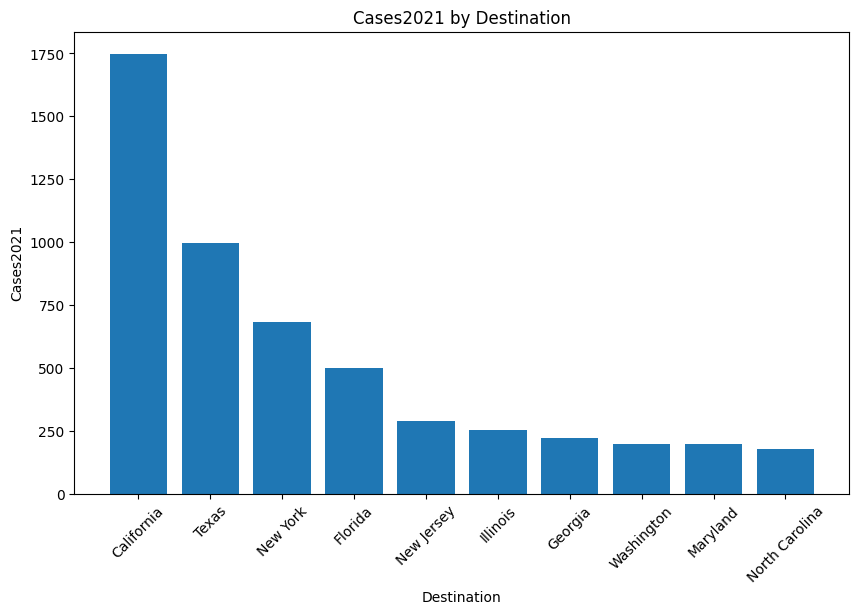

In [363]:
plt.figure(figsize=(10, 6))
plt.bar(top10cases['Destination'], top10cases['Cases2021'])
plt.xlabel('Destination')
plt.ylabel('Cases2021')
plt.title('Cases2021 by Destination')
plt.xticks(rotation=45)
plt.show()

### 2. What state had the most Inflow 

In [364]:
grouped_df = updateddf.groupby(by=['Destination']).sum()

In [365]:
grouped_df.sort_values(by='Population', ascending=False)

,Origin,Population,Cases2021,Incidence2021
Destination,,,,
California,Baldwin CountyBibb CountyBlount CountyButler C...,1804378,3723621,9580.5
Texas,Baldwin CountyBarbour CountyButler CountyCalho...,1557167,2250960,7684.0
Florida,Autauga CountyBaldwin CountyBarbour CountyBibb...,1121399,1076500,4951.9
New York,Baldwin CountyBullock CountyCalhoun CountyCham...,1000738,937759,4668.2
Georgia,Autauga CountyBaldwin CountyBarbour CountyBlou...,734958,351648,3326.4
Virginia,Autauga CountyBaldwin CountyBlount CountyCalho...,677792,235680,2651.4
Illinois,Baldwin CountyButler CountyCalhoun CountyChero...,636118,416814,3282.0
North Carolina,Autauga CountyBaldwin CountyBarbour CountyBlou...,614435,273764,2614.6
Pennsylvania,Baldwin CountyBlount CountyChambers CountyChil...,609227,231238,1810.9


In [366]:
grouped_df.head(10)

,Origin,Population,Cases2021,Incidence2021
Destination,,,,
Alabama,Autauga CountyBaldwin CountyBarbour CountyBibb...,245797,105560,2088.0
Alaska,Baldwin CountyClarke CountyCoffee CountyDale C...,59631,39962,5443.1
Arizona,Autauga CountyBaldwin CountyCalhoun CountyCham...,292149,195822,2732.4
Arkansas,Baldwin CountyChambers CountyCovington CountyD...,170910,67896,2263.2
California,Baldwin CountyBibb CountyBlount CountyButler C...,1804378,3723621,9580.5
Colorado,Autauga CountyBaldwin CountyCalhoun CountyCoff...,488148,99354,1713.0
Connecticut,Etowah CountyHouston CountyJefferson CountyLee...,173924,42012,1167.0
Delaware,Elmore CountyEscambia CountyEtowah CountyFayet...,43801,18122,1812.2
District of Columbia,Baldwin CountyButler CountyJefferson CountyLau...,62122,8298,1244.7


In [367]:
population_df = grouped_df.sort_values(by='Population', ascending=False)

In [368]:
pop10df=population_df.head(10)

In [369]:
pop10df.reset_index(inplace=True)

In [370]:
pop10df.index += 1

In [371]:
pop10df

,Destination,Origin,Population,Cases2021,Incidence2021
1,California,Baldwin CountyBibb CountyBlount CountyButler C...,1804378,3723621,9580.5
2,Texas,Baldwin CountyBarbour CountyButler CountyCalho...,1557167,2250960,7684.0
3,Florida,Autauga CountyBaldwin CountyBarbour CountyBibb...,1121399,1076500,4951.9
4,New York,Baldwin CountyBullock CountyCalhoun CountyCham...,1000738,937759,4668.2
5,Georgia,Autauga CountyBaldwin CountyBarbour CountyBlou...,734958,351648,3326.4
6,Virginia,Autauga CountyBaldwin CountyBlount CountyCalho...,677792,235680,2651.4
7,Illinois,Baldwin CountyButler CountyCalhoun CountyChero...,636118,416814,3282.0
8,North Carolina,Autauga CountyBaldwin CountyBarbour CountyBlou...,614435,273764,2614.6
9,Pennsylvania,Baldwin CountyBlount CountyChambers CountyChil...,609227,231238,1810.9
10,Ohio,Baldwin CountyBarbour CountyBlount CountyCalho...,588893,226651,1951.3


''

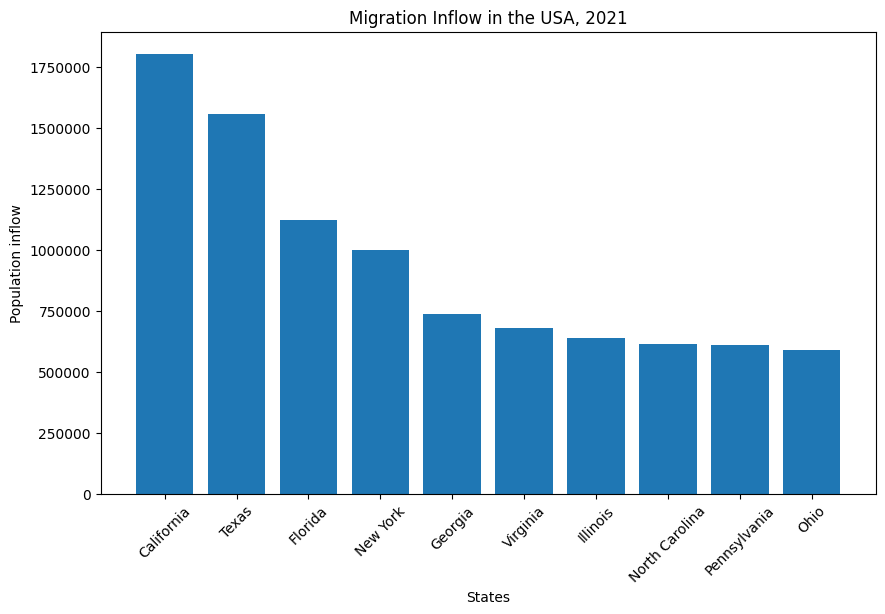

In [372]:
plt.figure(figsize=(10,6))
plt.bar(pop10df['Destination'], pop10df['Population'])
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Migration Inflow in the USA, 2021')
plt.xlabel('States')
plt.ylabel('Population inflow')
;

### 3. Finally, What state had the most Incidents ?

In [373]:
updateddf.sort_values(by='Incidence2021', ascending=False)

,Origin,Destination,Population,Cases2021,Incidence2021
1727,Hays County,Alaska,38,58,7.9
1596,Johnston County,Alaska,20,58,7.9
1598,Lincoln County,Alaska,21,58,7.9
1599,Mecklenburg County,Alaska,38,58,7.9
1600,Moore County,Alaska,67,58,7.9
...,...,...,...,...,...
53586,Monroe County,West Virginia,86,6,0.3
53587,Nassau County,West Virginia,6,6,0.3
53588,New York County,West Virginia,37,6,0.3
53589,Niagara County,West Virginia,71,6,0.3


In [374]:
sorted_df = updateddf.sort_values(by='Incidence2021', ascending=False)

In [375]:
unique_destinations_df = sorted_df.drop_duplicates(subset='Destination')

In [376]:
top10inci2021=unique_destinations_df.head(10)

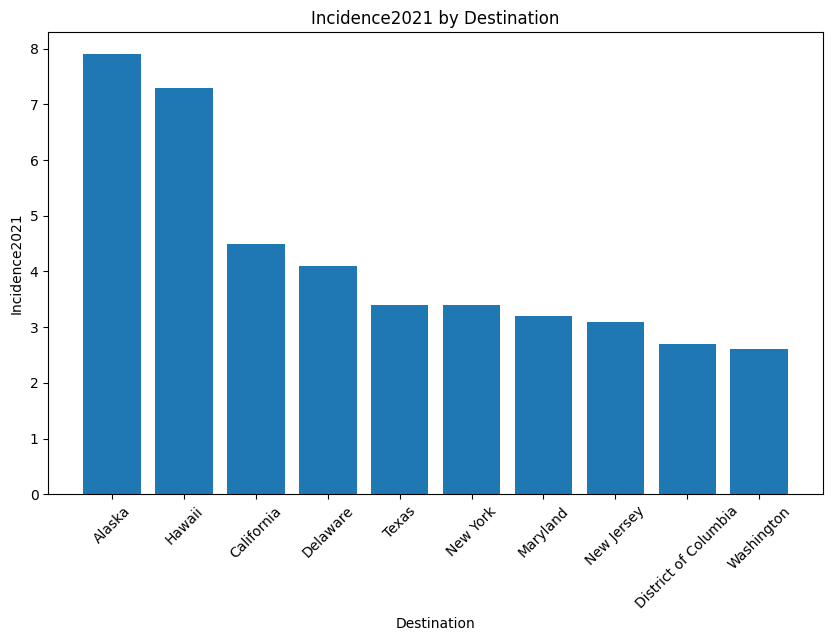

In [377]:
plt.figure(figsize=(10, 6))
plt.bar(top10inci2021['Destination'], top10inci2021['Incidence2021'])
plt.xlabel('Destination')
plt.ylabel('Incidence2021')
plt.title('Incidence2021 by Destination')
plt.xticks(rotation=45)
plt.show()

### FRom these we can say:

1. California had the most cases in this year, irregardless of the immigration. Good to note Wyoming has the lowest tubercolosis cases

2. In terms of Migration Inflow during 2021, which would have definitely been a factor in the rise of TB in the US, once again California comes out on top with Vermont least.

3. Conclusively, we can answer that Alaska specifically had the most Incidents in 2021, as seen in the bar right above.

now, investigating Alaksa specifically:

In [378]:
alaskadf = updateddf[updateddf['Destination']=='Alaska']

#filtering for only where Alaska was the destination

In [379]:
alaskadf

,Origin,Destination,Population,Cases2021,Incidence2021
1161,Baldwin County,Alaska,32,58,7.9
1162,Clarke County,Alaska,3,58,7.9
1163,Coffee County,Alaska,23,58,7.9
1164,Dale County,Alaska,71,58,7.9
1165,Fayette County,Alaska,4,58,7.9
...,...,...,...,...,...
1845,Sheridan County,Alaska,2,58,7.9
1846,Sweetwater County,Alaska,5,58,7.9
1847,Teton County,Alaska,7,58,7.9
1848,Juana Daz Municipio,Alaska,1,58,7.9


In [380]:
#we need to reset all of the index

alaskadf.reset_index(inplace=True)

In [381]:
alaskadf.index += 1

In [382]:
alaskadf

,index,Origin,Destination,Population,Cases2021,Incidence2021
1,1161,Baldwin County,Alaska,32,58,7.9
2,1162,Clarke County,Alaska,3,58,7.9
3,1163,Coffee County,Alaska,23,58,7.9
4,1164,Dale County,Alaska,71,58,7.9
5,1165,Fayette County,Alaska,4,58,7.9
...,...,...,...,...,...,...
685,1845,Sheridan County,Alaska,2,58,7.9
686,1846,Sweetwater County,Alaska,5,58,7.9
687,1847,Teton County,Alaska,7,58,7.9
688,1848,Juana Daz Municipio,Alaska,1,58,7.9


In [383]:
#droppinf former index, 

alaskadf=alaskadf.drop(columns=['index'])

In [384]:
#validating only alaska destinations are there

alaskadf.Destination.value_counts()

Destination
Alaska    689
Name: count, dtype: int64

In [385]:
alaskadf.head(20)

,Origin,Destination,Population,Cases2021,Incidence2021
1,Baldwin County,Alaska,32,58,7.9
2,Clarke County,Alaska,3,58,7.9
3,Coffee County,Alaska,23,58,7.9
4,Dale County,Alaska,71,58,7.9
5,Fayette County,Alaska,4,58,7.9
6,Houston County,Alaska,57,58,7.9
7,Lauderdale County,Alaska,26,58,7.9
8,Lee County,Alaska,13,58,7.9
9,Madison County,Alaska,37,58,7.9
10,Mobile County,Alaska,72,58,7.9


In [386]:
topcountys=alaskadf.sort_values(by='Population', ascending=False).head(15)

In [387]:
topcountys

,Origin,Destination,Population,Cases2021,Incidence2021
17,Anchorage Municipality,Alaska,4806,58,7.9
33,Matanuska-Susitna Borough,Alaska,4130,58,7.9
24,Fairbanks North Star Borough,Alaska,1967,58,7.9
28,Kenai Peninsula Borough,Alaska,1494,58,7.9
636,King County,Alaska,957,58,7.9
109,El Paso County,Alaska,878,58,7.9
27,Juneau City and Borough,Alaska,859,58,7.9
49,Maricopa County,Alaska,847,58,7.9
316,Hennepin County,Alaska,844,58,7.9
141,Orange County,Alaska,681,58,7.9


''

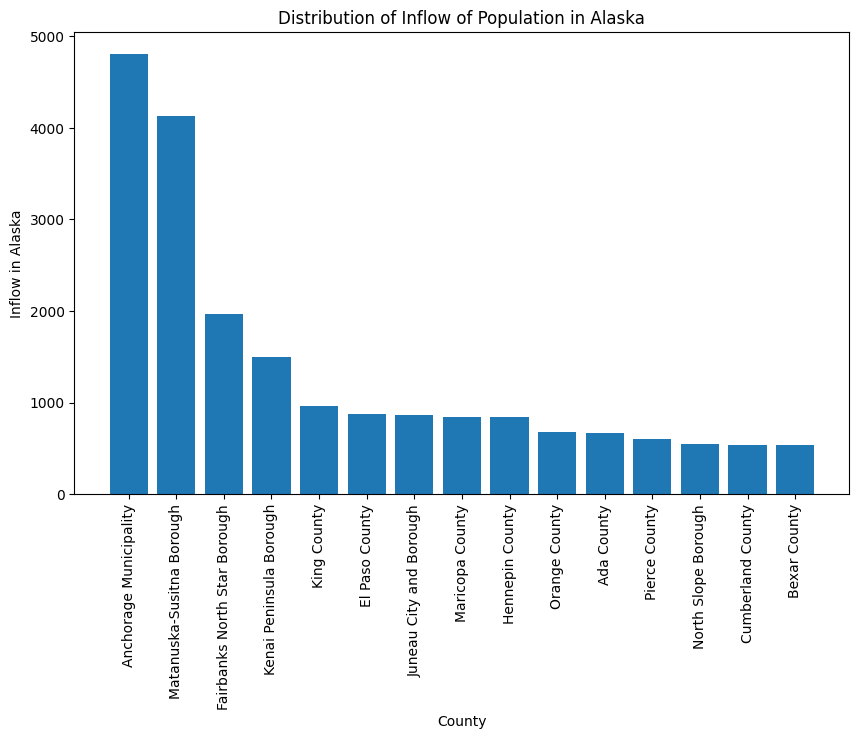

In [388]:
plt.figure(figsize=(10,6))
plt.bar(topcountys['Origin'], topcountys['Population'])
plt.xticks(rotation=90)
plt.title('Distribution of Inflow of Population in Alaska')
plt.xlabel('County')
plt.ylabel('Inflow in Alaska')
;

*Answer to research question:* As seen in our final barplot above,

1. Anchorage Municipality (4806)
2. Matanuska-Susitna Borough (4130)
3. Fairbanks North Star Borough (1967); in that exact order had the most inflow into Alaska during 2021. 


### **5.2:** Reflection


* The structure could have been properly grouped to give more insights, this especially in terms of duplication of the destination columns
* Realistically, due to the nature of the duplicates, proper Exploratory Data Analysis coulndt be carried out.
* Mapping of 'Origins'(after filtering, they were in temrs of their USA counties) to states could have helped tidy our data even more